# Machine Learning

## Neural Network

#### Semester: Spring 2020
Ana Claudia Alferes (M20190932)

# Data Exploration

In [349]:
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

In [350]:
data = pd.read_csv('train.csv')

In [351]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Guest_ID,9100,NaN,NaN,NaN,16538.1,3764.4,10001,13272.8,16528.5,19810.5,23000
Gender,9100,2,Female,4622,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Frequent_Traveler,9100,NaN,NaN,NaN,0.814505,0.38872,0,1,1,1,1
Age,9100,NaN,NaN,NaN,39.4562,15.1324,7,27,40,51,85
Type,9100,2,Business travel,6296,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Flight_Class,9100,3,Business,4316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Points,9100,NaN,NaN,NaN,1969.29,1019.19,50,1354,1916,2529,6097
Room,9100,NaN,NaN,NaN,2.84736,1.38821,0,2,3,4,5
Check-in/Check-out,9100,NaN,NaN,NaN,2.97648,1.53914,0,2,3,4,5
F&B,9100,NaN,NaN,NaN,2.85835,1.44201,0,2,3,4,5


In [352]:
data.isnull().sum()

Guest_ID              0
Gender                0
Frequent_Traveler     0
Age                   0
Type                  0
Flight_Class          0
Points                0
Room                  0
Check-in/Check-out    0
F&B                   0
Location              0
Wifi                  0
Entertainment         0
Gym                   0
Spa                   0
Staff                 0
Pool                  0
Baggage_Handling      0
Reception             0
Cleanliness           0
Online_Booking        0
Deposit_Kept          0
Time_Room_Service     0
Repeater              0
dtype: int64

In [353]:
data.columns.values

array(['Guest_ID', 'Gender', 'Frequent_Traveler', 'Age', 'Type',
       'Flight_Class', 'Points', 'Room', 'Check-in/Check-out', 'F&B',
       'Location', 'Wifi', 'Entertainment', 'Gym', 'Spa', 'Staff', 'Pool',
       'Baggage_Handling', 'Reception', 'Cleanliness', 'Online_Booking',
       'Deposit_Kept', 'Time_Room_Service', 'Repeater'], dtype=object)

In [354]:
df = data.drop(columns=['Guest_ID', 'Repeater']) 

In [355]:
non_numerical_var = ["Gender","Type", "Flight_Class","Frequent_Traveler"]
numerical_var = list(set(df.columns.values) - set(non_numerical_var))

In [356]:
for col in non_numerical_var:
    print("--------------------" + col + "--------------------")
    print(df[col].value_counts())
    print("\n")

--------------------Gender--------------------
Female    4622
Male      4478
Name: Gender, dtype: int64


--------------------Type--------------------
Business travel    6296
Personal Travel    2804
Name: Type, dtype: int64


--------------------Flight_Class--------------------
Business    4316
Eco         4131
Eco Plus     653
Name: Flight_Class, dtype: int64


--------------------Frequent_Traveler--------------------
1    7412
0    1688
Name: Frequent_Traveler, dtype: int64




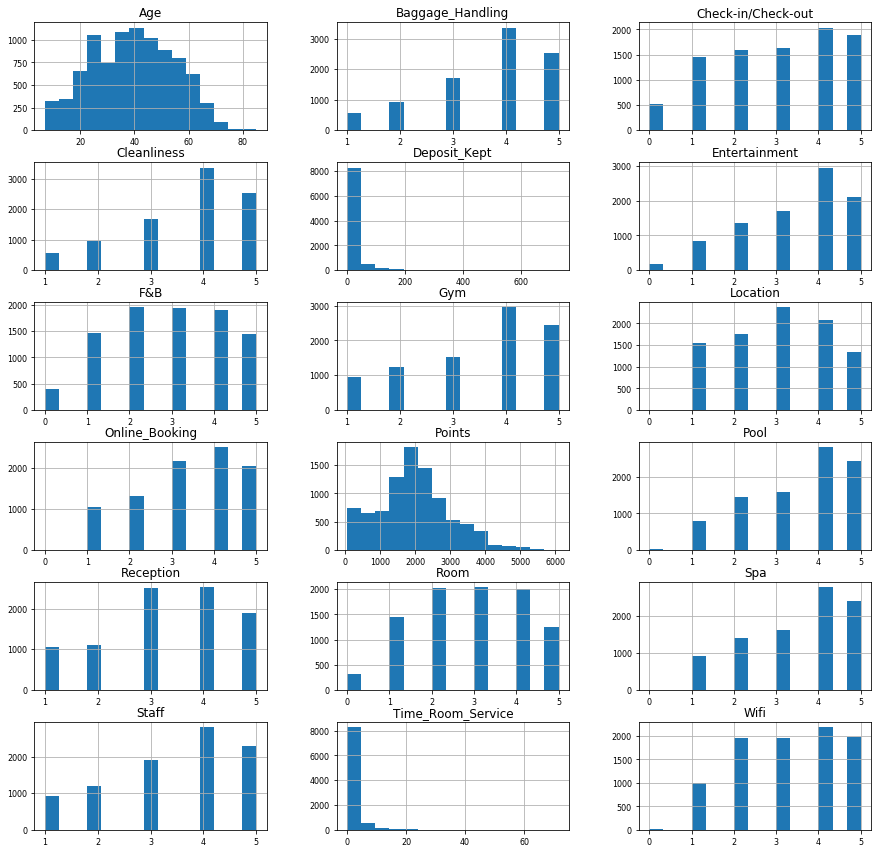

In [357]:
# Do histograms on all numeric variables
df[numerical_var].hist(bins=15, figsize=(15, 20), layout=(8, 3), xlabelsize=8, ylabelsize=8);

In [358]:
rep = data[data.Repeater == 1].Repeater.count()
Nrep = data[data.Repeater == 0].Repeater.count()

fig = go.Figure(go.Pie(labels=['Repeated','Not Repeated'], values=[rep, Nrep]))
fig.update_layout(height=300, width=400, title_text='Repeated VS. Not Repeated')
fig.show()

In [359]:
rep = data[data.Repeater == 1][["Gender","Repeater"]].groupby(["Gender"]).count().sort_values(by = "Repeater", ascending = False).reset_index() 
Nrep= data[data.Repeater == 0][["Gender","Repeater"]].groupby(["Gender"]).count().sort_values(by = "Repeater", ascending = False).reset_index()

pf_group = rep.merge(Nrep, left_on= "Gender", right_on="Gender" ).head()

x=pf_group.Gender.values

fig = go.Figure(go.Bar(x=x, y=pf_group.Repeater_x, name='Repetead'))
fig.add_trace(go.Bar(x=x, y=pf_group.Repeater_y, name='Not Repetead'))

fig.update_layout(barmode='stack',height=400, width=400, title_text="Repeated VS. Not Repeated by Gender")
fig.show()

In [360]:
rep = data[data.Repeater == 1][["Frequent_Traveler","Repeater"]].groupby(["Frequent_Traveler"]).count().sort_values(by = "Repeater", ascending = False).reset_index() 
Nrep= data[data.Repeater == 0][["Frequent_Traveler","Repeater"]].groupby(["Frequent_Traveler"]).count().sort_values(by = "Repeater", ascending = False).reset_index()

pf_group = rep.merge(Nrep, left_on= "Frequent_Traveler", right_on="Frequent_Traveler" ).head()
fig = go.Figure(data=[ 
    go.Bar(name='Repeated', x=pf_group['Frequent_Traveler'], y=pf_group['Repeater_x']),
    go.Bar(name='Not Repeated', x=pf_group['Frequent_Traveler'], y=pf_group['Repeater_y'])

]) 

# Change the bar mode 
fig.update_layout(barmode="group",height=300, width=600, title_text="Repeated VS. Not Repeated by Frequent Traveler", plot_bgcolor="white")
fig.show() 

In [361]:
rep = data[data.Repeater == 1][["Type","Repeater"]].groupby(["Type"]).count().sort_values(by = "Repeater", ascending = False).reset_index() 
Nrep= data[data.Repeater == 0][["Type","Repeater"]].groupby(["Type"]).count().sort_values(by = "Repeater", ascending = False).reset_index()

pf_group = rep.merge(Nrep, left_on= "Type", right_on="Type" ).head()
fig = go.Figure(data=[ 
    go.Bar(name='Repeated', x=pf_group['Type'], y=pf_group['Repeater_x']),
    go.Bar(name='Not Repeated', x=pf_group['Type'], y=pf_group['Repeater_y'])

]) 

# Change the bar mode 
fig.update_layout(barmode="group",height=300, width=600, title_text="Repeated VS. Not Repeated by Type", plot_bgcolor="white")
fig.show() 

In [362]:
rep = data[data.Repeater == 1][["Flight_Class","Repeater"]].groupby(["Flight_Class"]).count().sort_values(by = "Repeater", ascending = False).reset_index() 
Nrep= data[data.Repeater == 0][["Flight_Class","Repeater"]].groupby(["Flight_Class"]).count().sort_values(by = "Repeater", ascending = False).reset_index()

pf_group = rep.merge(Nrep, left_on= "Flight_Class", right_on="Flight_Class" ).head()
fig = go.Figure(data=[ 
    go.Bar(name='Repeated', x=pf_group['Flight_Class'], y=pf_group['Repeater_x']),
    go.Bar(name='Not Repeated', x=pf_group['Flight_Class'], y=pf_group['Repeater_y'])

]) 

# Change the bar mode 
fig.update_layout(barmode="group",height=300, width=600, title_text="Repeated VS. Not Repeated by Flight_Class", plot_bgcolor="white")
fig.show() 

In [363]:
fig = go.Figure(data=[
    go.Histogram(x=data[data.Repeater == 1].Age,nbinsx=50, name="Repeated"),
    go.Histogram(x=data[data.Repeater == 0].Age,nbinsx=50, name="Not Repeated")
])

fig.update_layout(title_text="Age in Repeated and Not Repeated")
fig.show() 

In [364]:
fig = go.Figure(data=[
    go.Histogram(x=data[data.Repeater == 1].Points,nbinsx=50, name="Repeated"),
    go.Histogram(x=data[data.Repeater == 0].Points,nbinsx=50, name="Not Repeated")
])

fig.update_layout(title_text="Points in Repeated and Not Repeated")
fig.show() 

In [365]:
fig = go.Figure(data=[
    go.Histogram(x=data[data.Repeater == 1].Deposit_Kept,nbinsx=30, name="Repeated"),
    go.Histogram(x=data[data.Repeater == 0].Deposit_Kept,nbinsx=30, name="Not Repeated")
])

fig.update_layout(title_text="Deposit Kept in Repeated and Not Repeated")
fig.show() 

In [366]:
fig = go.Figure(data=[
    go.Histogram(x=data[data.Repeater == 1].Time_Room_Service,nbinsx=30, name="Repeated"),
    go.Histogram(x=data[data.Repeater == 0].Time_Room_Service,nbinsx=30, name="Not Repeated")
])

fig.update_layout(title_text="Time Room Service in Repeated and Not Repeated")
fig.show() 

In [367]:
data['TotalEvaluation'] = data['Room']+ data['Check-in/Check-out'] + data['F&B'] + data['Location']+ data['Wifi'] + data['Entertainment']+ data['Gym'] + data['Spa']+ data['Staff']+ data['Pool'] + data['Baggage_Handling']  + data['Reception'] + data['Cleanliness'] + data['Online_Booking']

fig = go.Figure(data=[
    go.Histogram(x=data[data.Repeater == 1].TotalEvaluation,nbinsx=50, name="Repeated"),
    go.Histogram(x=data[data.Repeater == 0].TotalEvaluation,nbinsx=50, name="Not Repeated")
])

fig.update_layout(title_text="Total Evaluation in Repeated and Not Repeated")
fig.show() 

# Data Preparation

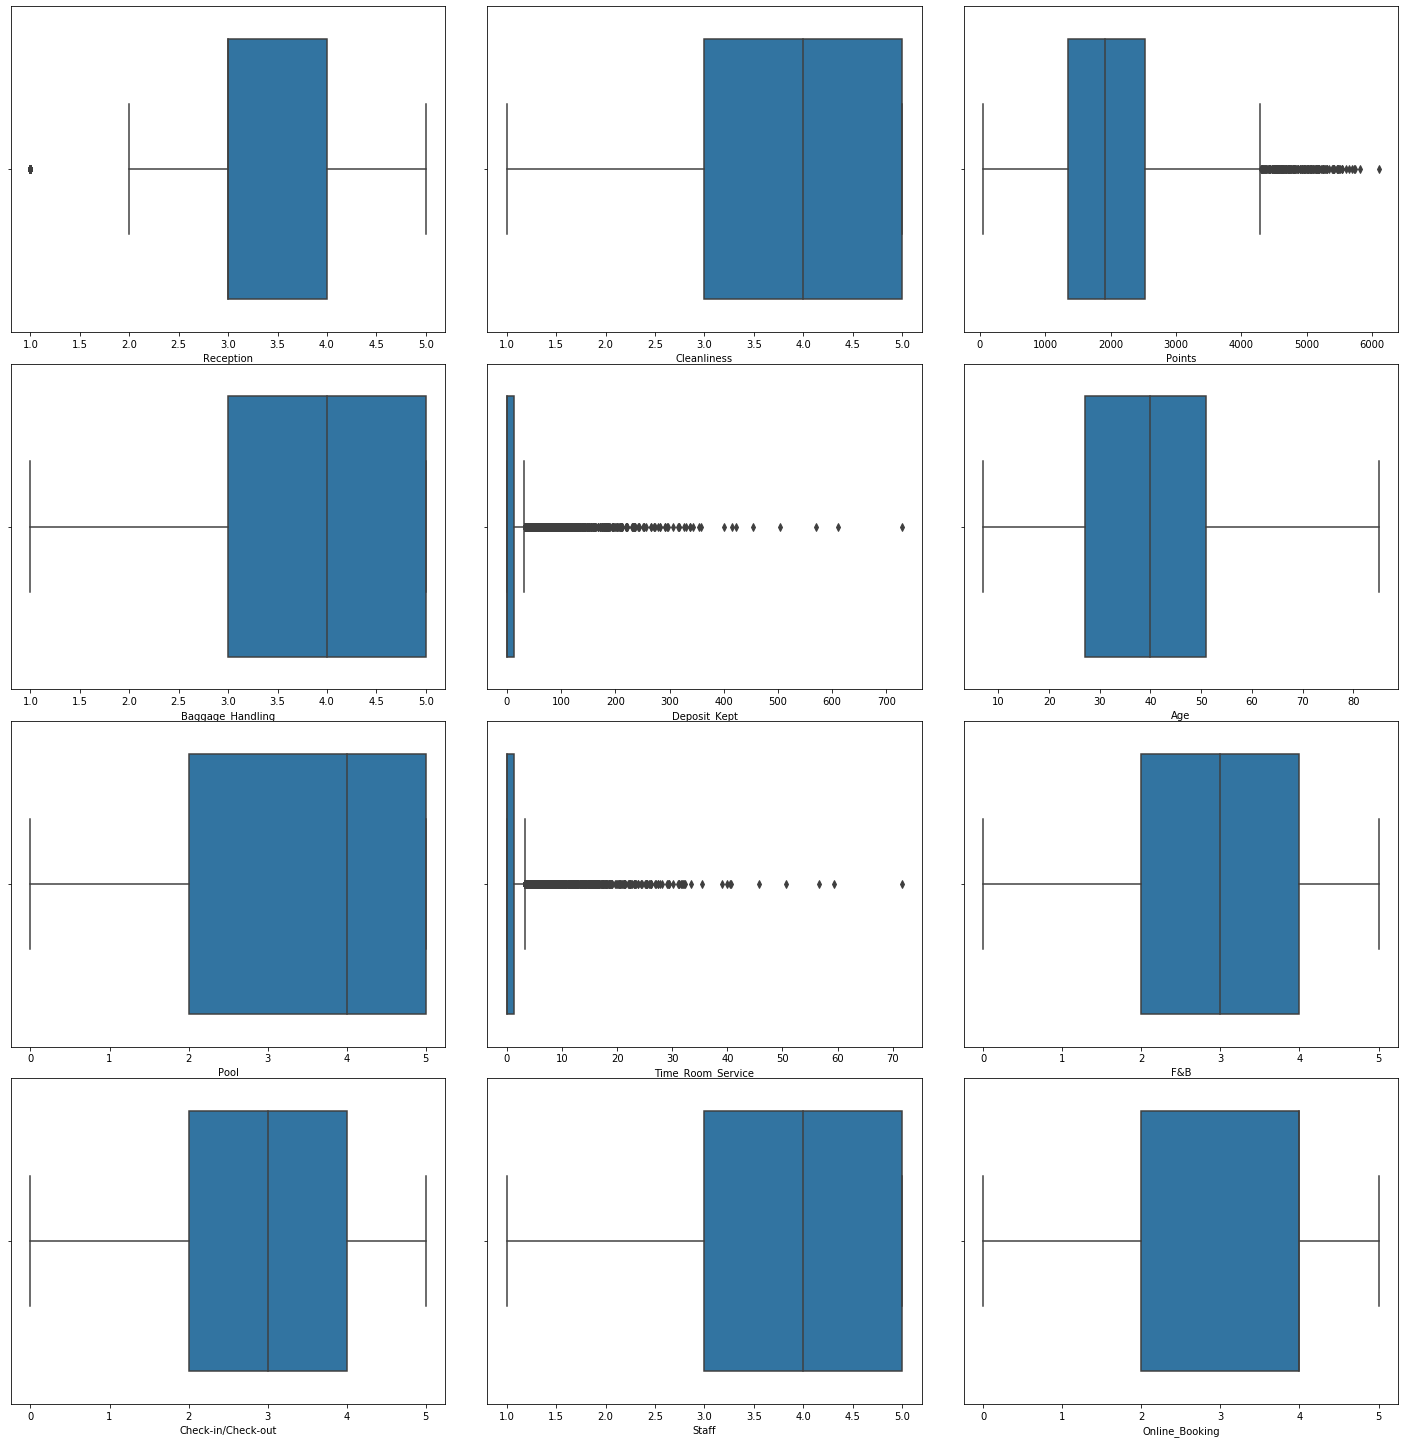

In [368]:
#boxplots to detect outliers
fig, ax = plt.subplots(4, 3, figsize=(20, 20))
fig.tight_layout()
for var, subplot in zip(df[numerical_var], ax.flatten()):
    sns.boxplot(df[var], ax=subplot)

In [369]:
data["DummyGender"] = data.Gender.apply(lambda x: 1 if x=="Male" else 0) #Male = 1 , Female = 0

data["DummyType"] = data.Type.apply(lambda x: 1 if x=="Business travel" else 0) #Business travel = 1 , Personal Travel = 0

data["DummyFlight_Class"] = data.Flight_Class.apply(lambda x: 1 if x=="Business" else 0) #Business = 1 , Eco = 0, Eco Plus = 2


In [370]:
data.corr()["Repeater"].sort_values(ascending = False )

Repeater              1.000000
Entertainment         0.522975
TotalEvaluation       0.495110
Spa                   0.415727
Gym                   0.386269
Staff                 0.341150
Online_Booking        0.318723
DummyFlight_Class     0.306919
Pool                  0.304814
Frequent_Traveler     0.294774
Reception             0.272605
Cleanliness           0.256192
Room                  0.247699
Baggage_Handling      0.246393
Wifi                  0.217296
Age                   0.121956
F&B                   0.118043
DummyType             0.103605
Guest_ID             -0.001144
Location             -0.016302
Check-in/Check-out   -0.020523
Points               -0.039045
Deposit_Kept         -0.087066
Time_Room_Service    -0.093331
DummyGender          -0.200961
Name: Repeater, dtype: float64

# Feature Selection

In [371]:
dt = data.iloc[:,[2,3,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,24,25,26,27]]
target = data.iloc[:,-5]

print(dt.columns)
data.columns

Index(['Frequent_Traveler', 'Age', 'Points', 'Room', 'Check-in/Check-out',
       'F&B', 'Location', 'Wifi', 'Entertainment', 'Gym', 'Spa', 'Staff',
       'Pool', 'Baggage_Handling', 'Reception', 'Cleanliness',
       'Online_Booking', 'Deposit_Kept', 'Time_Room_Service',
       'TotalEvaluation', 'DummyGender', 'DummyType', 'DummyFlight_Class'],
      dtype='object')


Index(['Guest_ID', 'Gender', 'Frequent_Traveler', 'Age', 'Type',
       'Flight_Class', 'Points', 'Room', 'Check-in/Check-out', 'F&B',
       'Location', 'Wifi', 'Entertainment', 'Gym', 'Spa', 'Staff', 'Pool',
       'Baggage_Handling', 'Reception', 'Cleanliness', 'Online_Booking',
       'Deposit_Kept', 'Time_Room_Service', 'Repeater', 'TotalEvaluation',
       'DummyGender', 'DummyType', 'DummyFlight_Class'],
      dtype='object')

In [372]:
model = LinearRegression()
rfe = RFE(estimator = model)
X_rfe = rfe.fit_transform(X = dt, y = target) 
model.fit(X = X_rfe,y = target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [373]:
rfe.support_

array([ True, False, False,  True, False,  True, False, False,  True,
       False,  True,  True,  True, False,  True, False, False, False,
       False, False,  True,  True,  True])

In [374]:
rfe.ranking_

array([ 1, 12, 13,  1,  2,  1,  9,  3,  1, 10,  1,  1,  1,  6,  1,  8,  7,
       11,  5,  4,  1,  1,  1])

In [375]:
selected_features = pd.Series(rfe.support_, index = dt.columns)
selected_features

Frequent_Traveler      True
Age                   False
Points                False
Room                   True
Check-in/Check-out    False
F&B                    True
Location              False
Wifi                  False
Entertainment          True
Gym                   False
Spa                    True
Staff                  True
Pool                   True
Baggage_Handling      False
Reception              True
Cleanliness           False
Online_Booking        False
Deposit_Kept          False
Time_Room_Service     False
TotalEvaluation       False
DummyGender            True
DummyType              True
DummyFlight_Class      True
dtype: bool

In [411]:
dt = data.iloc[:,[2,7,8,9,11,12,15,18,25,26,27]]
target = data.iloc[:,-5]
print(dt.columns)
data.columns

Index(['Frequent_Traveler', 'Room', 'Check-in/Check-out', 'F&B', 'Wifi',
       'Entertainment', 'Staff', 'Reception', 'DummyGender', 'DummyType',
       'DummyFlight_Class'],
      dtype='object')


Index(['Guest_ID', 'Gender', 'Frequent_Traveler', 'Age', 'Type',
       'Flight_Class', 'Points', 'Room', 'Check-in/Check-out', 'F&B',
       'Location', 'Wifi', 'Entertainment', 'Gym', 'Spa', 'Staff', 'Pool',
       'Baggage_Handling', 'Reception', 'Cleanliness', 'Online_Booking',
       'Deposit_Kept', 'Time_Room_Service', 'Repeater', 'TotalEvaluation',
       'DummyGender', 'DummyType', 'DummyFlight_Class'],
      dtype='object')

# Modelling

In [412]:
scaler = StandardScaler().fit(dt.iloc[:,1:7])
scaler_dt = pd.DataFrame(scaler.transform(dt.iloc[:,1:7]))
scaler_dt2 = pd.concat([scaler_dt, (dt.loc[:,['Frequent_Traveler','DummyGender',"DummyType","DummyFlight_Class"]]).reset_index(drop=True)], axis=1)

X_train, X_val, y_train, y_val = train_test_split(scaler_dt2, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=15, 
                                                    shuffle=True, 
                                                    stratify=target
                                                   )

In [413]:
model_scaler = MLPClassifier().fit(X_train, y_train)

/Users/anaalferes/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [414]:
labels_val = model_scaler.predict(X_val)
print(labels_val)

[0 1 1 ... 1 1 0]


In [415]:
model_scaler.score(X_val, y_val)

0.9186813186813186

# Test Database

In [403]:
test = pd.read_csv('test.csv')

In [404]:
#New features
test["DummyGender"] = test.Gender.apply(lambda x: 1 if x=="Male" else 0) #Male = 1 , Female = 0

test["DummyType"] = test.Type.apply(lambda x: 1 if x=="Business travel" else 0) #Business travel = 1 , Personal Travel = 0

test["DummyFlight_Class"] = test.Flight_Class.apply(lambda x: 1 if x=="Business" else 0) #Business = 1


In [417]:
#X_test = test.iloc[:,[2,7,8,9,11,12,15,18,25,26,28]]
X_test = test.iloc[:,[2,7,8,9,11,12,15,18,23,24,25]]
print(X_test.columns)
scaler = StandardScaler().fit(X_test.iloc[:,1:7])
scaler_test = pd.DataFrame(scaler.transform(X_test.iloc[:,1:7]))
scaler_test_2 = pd.concat([scaler_test, (X_test.loc[:,['Frequent_Traveler','DummyGender',"DummyType","DummyFlight_Class"]]).reset_index(drop=True)], axis=1)

Index(['Frequent_Traveler', 'Room', 'Check-in/Check-out', 'F&B', 'Wifi',
       'Entertainment', 'Staff', 'Reception', 'DummyGender', 'DummyType',
       'DummyFlight_Class'],
      dtype='object')


In [418]:
labels_test = model_scaler.predict(scaler_test_2)

test["Repeater"] = labels_test

csv = test.iloc[:,[0,-1]]
csv.to_csv('Final_try.csv',index=False)

In [421]:
a = pd.read_csv('Final_try.csv')

print(a[a['Repeater'] == 1].count())
a[a['Repeater'] == 0].count()

Guest_ID    2100
Repeater    2100
dtype: int64


Guest_ID    1800
Repeater    1800
dtype: int64

In [422]:
rep = a[a.Repeater == 1].Repeater.count()
Nrep = a[a.Repeater == 0].Repeater.count()

fig = go.Figure(go.Pie(labels=['Repeated','Not Repeated'], values=[rep, Nrep]))
fig.update_layout(height=300, width=400, title_text='Repeated VS. Not Repeated')
fig.show()